# PCA - Principal Component Analysis applied to Google Mobility DS

Principal Component Analysis (PCA) is a linear dimensionality reduction technique that can be utilized for extracting information from a high-dimensional space by projecting it into a lower-dimensional sub-space. It tries to preserve the essential parts that have more variation of the data and remove the non-essential parts with fewer variation.

[Ref1](https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60)
[Ref2](https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html)
[Help](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

In [1]:
# Carregar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import warnings
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings("ignore")

sns.set_theme(style="darkgrid")
plt.style.use('bmh')
%matplotlib inline

In [2]:
df_cidade = pd.read_pickle('./dataframes/df_mob_cidade.pkl')

<AxesSubplot:xlabel='component_1', ylabel='component_2'>

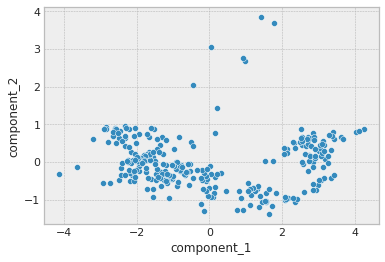

In [3]:
# Separating out the features
features = ['Retail_Recriation','Grocery_Pharmacy','Parks','Transit','Workplaces']
x = df_cidade.loc[:, features].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
projected = pca.fit_transform(x)
principalDf = pd.DataFrame(data = projected
             , columns = ['component_1','component_2'])

sns.scatterplot(x='component_1',y='component_2',data=principalDf)
#sns.scatterplot(x='date', y='component_1', hue='new_confirmed', data=df)
#principalDf.plot.scatter('component_2','component_1',figsize=(18,10))

In [4]:
final_df = pd.concat([df_cidade.reset_index(),principalDf[['component_1','component_2']]],axis=1)
final_df = final_df.set_index('date')


<AxesSubplot:xlabel='component_2', ylabel='Retail_Recriation'>

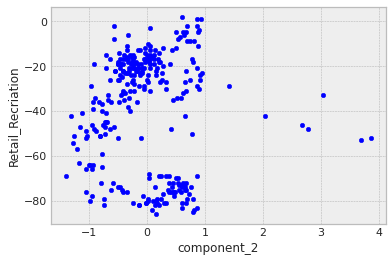

In [5]:
final_df.plot.scatter(x='component_2',y='Retail_Recriation')

<AxesSubplot:xlabel='date'>

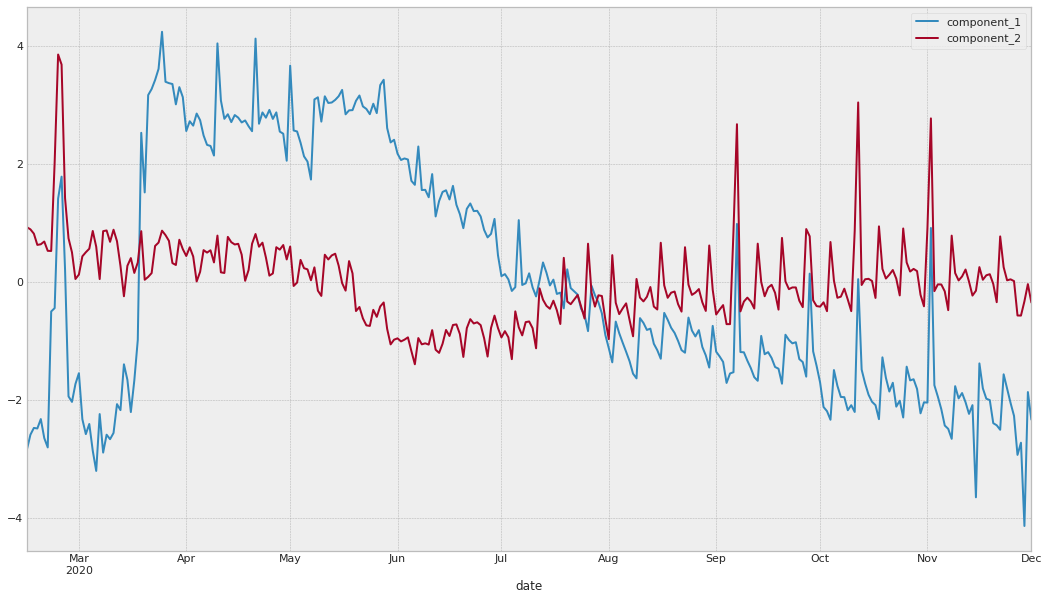

In [6]:
final_df[['component_1','component_2']].plot.line(figsize=(18,10))

In [7]:
final_df.to_pickle('./dataframes/df_mob_cidade_pca.pkl')

In [8]:
df_cidade

Retail_Recriation  Grocery_Pharmacy  Parks  Transit  Workplaces  \
date                                                                          
2020-02-15                1.0               6.0  -19.0      3.0         3.0   
2020-02-16               -4.0               6.0  -21.0      1.0        -1.0   
2020-02-17               -9.0              -3.0  -27.0      6.0        10.0   
2020-02-18               -5.0              -2.0  -31.0      5.0        10.0   
2020-02-19               -6.0              -3.0  -32.0      2.0         8.0   
...                       ...               ...    ...      ...         ...   
2020-11-27               -2.0              33.0  -39.0      2.0        -5.0   
2020-11-28               -8.0              25.0  -43.0      2.0         4.0   
2020-11-29               -6.0              39.0  -24.0     28.0        13.0   
2020-11-30              -18.0              12.0  -42.0     -5.0        -7.0   
2020-12-01              -11.0              23.0  -42.0      0.0        -9.0   

            Residential  
date                     
2020-02-15          1.0  
2020-02-16          3.0  
2020-02-17          0.0  
2020-02-18         -1.0  
2020-02-19          0.0  
...                 ...  
2020-11-27          7.0  
2020-11-28          6.0  
2020-11-29          5.0  
2020-11-30          9.0  
2020-12-01          8.0  

[291 rows x 6 columns]